<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/PSant%C3%A9_01_notebooknettoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np

In [ ]:
df = pad.read_csv('data_projet2.csv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Exploration rapide des données

In [ ]:
df.shape

(320772, 162)

In [ ]:
df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,...,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,...,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,...,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.076167,10.832591,5.607988,7.971418,13.927752,1.978192,17.512632,6.494183,0.025534,0.029160,0.010597,25.175674,26.010496,NaN,4.972452e-07,...,0.694039,1.031398,2.236451,2.474306,1.277026,0.339262,1.206822,0.335163,5.132250,5.514738e-03,0.737912,1.475120,0.040660,0.189486,12.528768,0.149725,3.318263,12.058090,0.214408,13.498653,0.080953,0.914247,0.028036,0.067952,0.104503,0.006697,0.001118,0.001285,6.475588,0.172312,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064000,5.200000,NaN,NaN,61.0,NaN,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095000,0.043307,1.000000,1.080000,NaN,1.000000e-06,...,0.000000,0.000000,-0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

Evaluation des variables utilisables ou non pour la problématique

In [ ]:
print(f"Shape de la variable empreinte carbone : {str(df['carbon-footprint_100g'].shape)}")
print(f"Nombre de NaN de la variable empreinte carbone : {str(df['carbon-footprint_100g'].isna().sum())}")
print(f"Nombre de NaN de la variable pays d'origine :  {str(df['countries_fr'].isna().sum())}")

Shape de la variable empreinte carbone : (320772,)
Nombre de NaN de la variable empreinte carbone : 320504
Nombre de NaN de la variable pays d'origine :  280


Le feature 'carbon-footprint' n'est malheureusement pas utilisable pour la problématique car a trop peu de données. Je vais plutôt utiliser la variable "coutries_fr" qui a plus de données et créer un feature empreinte carbonne théorique en fonction de l'information du pays de production

Décompte des variables présentant un nombre de données manquantes trop important (suppression de ces variables si NaN > 50 %)


In [ ]:
df.shape

(320772, 162)

In [ ]:
df = df[df.columns[df.isna().sum()/len(df)*100 <= 50]]

In [ ]:
df.shape

(320772, 34)

In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


Vérifier le format des données de chaque variable d'intérêt (notamment que les données quantitatives soient bien en float ou int)

In [ ]:
df.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                             object
last_modified_datetime                      object
product_name                                object
brands                                      object
brands_tags                                 object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr             

Dans les variables d'intérêt quantitatives, vérifier qu'il n'existe pas de valeurs manquantes qui ne serait pas rentrées en tant que "NaN" mais sous une autre forme non prise en charge par pandas comme 'n/a'

In [ ]:
list_of_quantitative_variables_to_analyse = ["additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g", "nutrition-score-fr_100g", "nutrition-score-uk_100g"]
df[df[list_of_quantitative_variables_to_analyse] == "n/a" ].count()

code                                       0
url                                        0
creator                                    0
created_t                                  0
created_datetime                           0
last_modified_t                            0
last_modified_datetime                     0
product_name                               0
brands                                     0
brands_tags                                0
countries                                  0
countries_tags                             0
countries_fr                               0
ingredients_text                           0
serving_size                               0
additives_n                                0
additives                                  0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
nutrition_grade_fr                         0
states                                     0
states_tags                                0
states_fr 

Dans les variables d'intérêt qualitatives, vérifier qu'il n'existe pas de valeurs numériques, dans ce cas les remplacer par des NaN

In [ ]:
print(df[df["countries_fr"].values == "int"].count())
print(df[df["nutrition_grade_fr"].values == "int"].count())

code                                       0
url                                        0
creator                                    0
created_t                                  0
created_datetime                           0
last_modified_t                            0
last_modified_datetime                     0
product_name                               0
brands                                     0
brands_tags                                0
countries                                  0
countries_tags                             0
countries_fr                               0
ingredients_text                           0
serving_size                               0
additives_n                                0
additives                                  0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
nutrition_grade_fr                         0
states                                     0
states_tags                                0
states_fr 

Repérer les valeurs abérantes des variables quantitatives

In [ ]:
list_of_quantitative_variables_to_analyse = ["ingredients_from_palm_oil_n",  "ingredients_that_may_be_from_palm_oil_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g", "nutrition-score-fr_100g", "nutrition-score-uk_100g"]  
df[list_of_quantitative_variables_to_analyse].describe()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,221210.000000,221210.000000
mean,0.019659,0.055246,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,9.165535,9.058049
std,0.140524,0.269207,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,9.055903,9.183589
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000,1.000000
50%,0.000000,0.000000,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000,9.000000
75%,0.000000,0.000000,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000,16.000000
max,2.000000,6.000000,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000,40.000000


Les variables "*sugars_100g*", "*proteins_100g*", "*fiber_100g*" et "*nutrition-score-fr_100g*" présentent des valeurs négatives. C'est normal pour le nutriscore mais pas pour le sucre, les protéines et les fibres. Il faut mettre ces valeurs à zéro

In [ ]:
df[df['sugars_100g'] < 0] = np.nan
df[df['proteins_100g'] < 0] = np.nan
df[df['fiber_100g'] < 0] = np.nan

In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


Regarder si les valeurs aberrantes sont des valeurs dupliquées

In [ ]:
df[df[df.columns].duplicated()].count()

code                                       0
url                                        0
creator                                    1
created_t                                  1
created_datetime                           1
last_modified_t                            1
last_modified_datetime                     1
product_name                               1
brands                                     0
brands_tags                                0
countries                                  1
countries_tags                             1
countries_fr                               1
ingredients_text                           1
serving_size                               1
additives_n                                0
additives                                  0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
nutrition_grade_fr                         0
states                                     0
states_tags                                0
states_fr 

Les lignes dupliquées le sont dans des variables où c'est normal

Nettoyage des valeurs aberrantes en supprimant les données significativement (p<0.05) différentes de la valeur moyenne

In [ ]:
list_of_quantitative_variables_to_analyse = ["additives_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g"]
df_Quant = df[list_of_quantitative_variables_to_analyse]
df_Quant = df_Quant[np.abs(df_Quant-df_Quant.mean()) <= (1.96*df_Quant.std())]
df_Quant = df_Quant[np.abs(df_Quant-df_Quant.mean()) <= (1.96*df_Quant.std())]
df_Quant_abberrante = df_Quant[np.abs(df_Quant-df_Quant.mean()) >= (1.96*df_Quant.std())]

In [ ]:
df[list_of_quantitative_variables_to_analyse] = df_Quant

Vérification et évaluation de l'impact de la sélection des valeurs non-aberrantes

In [ ]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,216200.000000,248928.000000,248928.000000,254818.000000,219799.000000,204272.000000,233500.000000,212469.000000,188293.000000,229230.000000,251660.000000,255452.000000,221203.000000,221203.000000
mean,1.163548,0.019660,0.055249,1072.836232,8.307799,3.009089,29.448111,9.077407,1.975660,4.746879,0.969156,0.798774,9.165698,9.058186
std,1.284822,0.140527,0.269213,732.094542,9.957192,3.876410,26.829378,11.061230,2.304508,4.558338,1.453266,50.505512,9.055912,9.183584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,368.000000,0.000000,0.000000,5.420000,0.880000,0.000000,0.400000,0.060000,0.025000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1059.000000,3.390000,1.160000,18.640000,3.700000,1.200000,3.570000,0.551180,0.229000,10.000000,9.000000
75%,2.000000,0.000000,0.000000,1644.000000,14.985000,5.000000,54.930000,13.270000,3.300000,7.500000,1.313180,0.541000,16.000000,16.000000
max,4.000000,2.000000,6.000000,2700.000000,33.720000,14.400000,84.850000,42.550000,9.700000,17.270000,14.815820,25320.000000,40.000000,40.000000


Identification et quantification des valeurs aberrantes pour chaque variables

In [ ]:
df_Quant_abberrante.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,15243.0,3788.000000,15780.000000,15104.000000,2508.000000,16596.000000,14891.000000,12295.000000,9863.000000
mean,4.0,2581.007603,30.645248,12.556909,83.153066,36.387020,7.534057,15.266017,6.315536
std,0.0,62.324361,1.733467,1.235565,0.723462,3.412478,0.885584,1.066690,2.709330
min,4.0,2508.000000,27.850000,10.610000,82.050000,30.770000,6.500000,13.690000,3.820000
25%,4.0,2536.000000,28.890000,11.430000,82.500000,33.330000,6.900000,14.290000,4.400000
50%,4.0,2556.000000,30.500000,12.500000,83.330000,36.100000,7.100000,15.000000,5.260340
75%,4.0,2636.000000,32.140000,13.640000,83.330000,39.390000,8.000000,16.100000,7.112000
max,4.0,2700.000000,33.720000,14.400000,84.850000,42.550000,9.700000,17.270000,14.815820


Je vérifie que le seuil de sélection est bon, c'est à dire que les valeurs max sont cohérente avec les produits. Je regarde notamment les produits avec une energie max de 2700 ainsi qu'une quantité de graisse de 33.72

In [ ]:
df[df["energy_100g"] == 2700].head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
256083,4000400002129,http://world-fr.openfoodfacts.org/produit/4000...,date-limite-app,1475569570,2016-10-04T08:26:10Z,1489849683,2017-03-18T15:08:03Z,Rama Culinesse,Rama,rama,"Germany,Switzerland","en:germany,en:switzerland","Allemagne,Suisse","pflanzliche Öle (Raps, Sonnenblumen, Raps ganz...",10 ml,3.0,[ pflanzliche-ole -> de:pflanzliche-ole ] [...,0.0,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2700.0,NaN,7.0,0.5,0.5,NaN,0.5,1.300000,0.511811,19.0,19.0
277450,5410003001266,http://world-fr.openfoodfacts.org/produit/5410...,migi,1431766518,2015-05-16T08:55:18Z,1432503325,2015-05-24T21:35:25Z,Becel Cuire et Rôtir,Becel,becel,Belgique,en:belgium,Belgique,"Ingrédients: huiles végétales (huile de colza,...",NaN,NaN,[ ingredients -> fr:ingredients ] [ huiles-...,0.0,2.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2700.0,NaN,8.0,0.5,0.5,0.0,0.5,0.013000,0.005118,15.0,15.0
282031,5900300514502,http://world-fr.openfoodfacts.org/produit/5900...,tacinte,1415401836,2014-11-07T23:10:36Z,1446647888,2015-11-04T14:38:08Z,Kasia Margaryna 250g,"Unilever,Kasia","unilever,kasia",Poland,en:poland,Pologne,"tluszcze roślinne, oleje roślinne, woda, emulg...",NaN,3.0,[ tluszcze-roślinne -> pl:tluszcze-roślinne ...,0.0,0.0,d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",2700.0,NaN,NaN,0.5,0.5,0.5,0.5,0.089916,0.035400,18.0,18.0
285363,7318690032090,http://world-fr.openfoodfacts.org/produit/7318...,openfoodfacts-contributors,1487515917,2017-02-19T14:51:57Z,1487516439,2017-02-19T15:00:39Z,Pesto Basilika,ICA,ica,Sweden,en:sweden,Suède,NaN,NaN,NaN,NaN,NaN,NaN,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2700.0,NaN,8.3,4.4,1.6,6.7,3.4,4.300000,1.692913,21.0,21.0
286418,7610065143609,http://world-fr.openfoodfacts.org/produit/7610...,openfood-ch-import,1486496387,2017-02-07T19:39:47Z,1487255943,2017-02-16T14:39:03Z,Nuxo Purée d'amandes,NaN,NaN,Suisse,en:switzerland,Suisse,100% d'amandes.,NaN,0.0,[ 100-d-amandes -> fr:100-d-amandes ] [ 100...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2700.0,NaN,5.0,4.0,3.9,8.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["fat_100g"] == 33.72].head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
126717,689076309479,http://world-fr.openfoodfacts.org/produit/0689...,usda-ndb-import,1489144161,2017-03-10T11:09:21Z,1489144161,2017-03-10T11:09:21Z,"Alili, Green Olive Tapenade",Quisling Media,quisling-media,US,en:united-states,États-Unis,"Green olives,olive oil, cumin, garlic, citric ...",43 g (0.25 cup),1.0,[ green-olives -> en:green-olives ] [ olive...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1402.0,33.72,3.49,8.14,11.63,3.0,4.42,1.16840,0.460,10.0,10.0
163483,855780004218,http://world-fr.openfoodfacts.org/produit/0855...,usda-ndb-import,1489077446,2017-03-09T16:37:26Z,1489077446,2017-03-09T16:37:26Z,"Wholly Bites!, Spicy Curry Clusters",1908 Brands Inc.,1908-brands-inc,US,en:united-states,États-Unis,Our wholly nutritious ingredients organic coco...,43 g (0.5 cup),0.0,[ our-wholly-nutritious-ingredients-organic-c...,0.0,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1946.0,33.72,13.72,36.05,22.09,8.1,10.93,1.17602,0.463,19.0,19.0


Après vérification des produits en question et des valeurs max des variables, la suppresion des valeurs aberrantes par la sélection par 1.96*SD semble pertinente et suffisante

Etude d'autres abérations comme la présence plus importante d'acide gras saturé que d'acide gras

In [ ]:
df[df["fat_100g"] < df["saturated-fat_100g"]].head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2322,11110372680,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489143729,2017-03-10T11:02:09Z,1489143729,2017-03-10T11:02:09Z,Dried Cranberries,"Simple Truth Organic, The Kroger Co.","simple-truth-organic,the-kroger-co",US,en:united-states,États-Unis,"Cranberries, evaporated cane syrup, sunflower ...",40 g (0.25 cup),0.0,[ cranberries -> en:cranberries ] [ evapora...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1255.0,0.00,1.25,82.50,NaN,5.0,0.00,0.00000,0.000000,9.0,9.0
3450,11110823564,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489070136,2017-03-09T14:35:36Z,1489070136,2017-03-09T14:35:36Z,"Parfait, Strawberry, Orange, Grape",Psst,psst,US,en:united-states,États-Unis,"Sugar free strawberry parait: (water, gelatin,...",99 g (1 cup),NaN,[ sugar-free-strawberry-parait -> en:sugar-fr...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,1.31,1.62,0.00,NaN,NaN,NaN,0.06096,0.024000,NaN,NaN
6320,11150940290,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489093860,2017-03-09T21:11:00Z,1489093860,2017-03-09T21:11:00Z,Tzatziki Sauce,Roundy's,roundy-s,US,en:united-states,États-Unis,"Yogurt (grade a pasteurized skim milk, cream, ...",28 g (28 GRM),NaN,[ yogurt -> en:yogurt ] [ grade-a-pasteuriz...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",448.0,1.79,5.36,7.14,0.0,0.0,3.57,1.04394,0.411000,8.0,8.0
6570,11152010908,http://world-fr.openfoodfacts.org/produit/0011...,kiliweb,1487350559,2017-02-17T16:55:59Z,1489064639,2017-03-09T13:03:59Z,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G,Wel pac,wel-pac,"France, US","en:france,en:united-states","France,États-Unis",NaN,7.5 g (0.25 cup),NaN,NaN,NaN,NaN,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.0,0.00,1.00,40.00,0.0,0.0,NaN,NaN,9.448819,5.0,5.0
6621,11152066486,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489143780,2017-03-10T11:03:00Z,1489143781,2017-03-10T11:03:01Z,"Hime Brand, Kuromame Amani Prepared Black Soy ...",Jfc International Inc.,jfc-international-inc,US,en:united-states,États-Unis,"Black soy beans, water, sugar, chestnuts, tang...",95 g (0.5 cup),1.0,[ black-soy-beans -> en:black-soy-beans ] [...,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",837.0,0.00,1.05,36.84,0.0,6.3,13.68,1.57734,0.621000,-1.0,-1.0


In [ ]:
df[df["saturated-fat_100g"] > df["fat_100g"]] = np.nan

In [ ]:
df.shape

(320772, 34)

Suppression des variables sans intérêt pour la problématique de l'application 

NB_1 : les variables sur l'huile de palme sont à 0 après suppression des valeurs abberrantes, il n'y a plus lieu de les garder.

NB_2 : le nutriscore UK est quasiment identique à celui du nutriscore FR, il n'y a pas d'intérêt à le garder

Dernière vérification des données : le salt (de formule Na+Cl-) est certainement similaire au sodium (de formule Na+), il y a t-il une utilité à le garder ?

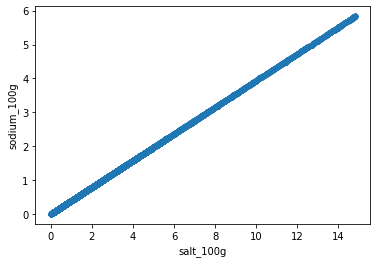

In [ ]:
df.plot.scatter(x='salt_100g',y='sodium_100g')

Réponse : non, suppresion de la variable sodium

Formattage de la database finale après nettoyage

In [ ]:
list_of_quantitative_variables_to_analyse = ["additives_n", "energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "nutrition-score-fr_100g"]
list_of_qualitative_variables_to_analyse = ["code", "countries_fr", "product_name"]
list_of_variable_of_interest = list_of_qualitative_variables_to_analyse + list_of_quantitative_variables_to_analyse
df_clean = df[list_of_variable_of_interest]

Renommer les variables pour plus de lisibilité

Il est choisit de supprimer les informations de quantité (les "_100g" sur les variables comme fat) afin de rendre les futurs graph plus lisible, mais dans le cas d'une application métier alors l'information serait notifiée dans une notice

In [ ]:
simpliest_name = {"code": "code_bar", "countries_fr": "countries",  "product_name": "product_name", "additives_n":"additives",  "energy_100g":"energy", "fat_100g": "fat", "saturated-fat_100g":"saturated-fat", "carbohydrates_100g": "carbohydrates", "sugars_100g":"sugars", "fiber_100g":"fiber", "proteins_100g":"proteins", "salt_100g":"salt", "nutrition-score-fr_100g":"nutriscore"}
df_clean.rename(columns=simpliest_name, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Reset des index maintenant que la database est nettoyée

In [ ]:
df_clean.reset_index(inplace=True, drop=True)

In [ ]:
df_clean.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore
0,3087,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,États-Unis,Banana Chips Sweetened (Whole),0.0,2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,14.0
2,4559,États-Unis,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.63500,0.0
3,16087,États-Unis,Organic Salted Nut Mix,0.0,2540.0,NaN,5.36,17.86,3.57,7.1,NaN,1.22428,12.0
4,16094,États-Unis,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN


Sauvegarde de la database nettoyée

In [ ]:
df_clean.to_csv('data_projet2_clean.csv', sep='\t', index=False)

In [ ]:
df[df["fat_100g"] == 0].head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
146,43595,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489050424,2017-03-09T09:07:04Z,1489050424,2017-03-09T09:07:04Z,Cranberries,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,[ cranberries -> en:cranberries ] [ sugar -...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1255.0,0.0,0.0,83.33,NaN,NaN,0.00,0.00000,0.000,8.0,8.0
147,45292,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069958,2017-03-09T14:32:38Z,1489069958,2017-03-09T14:32:38Z,Turkish Apricots,Northgate,northgate,US,en:united-states,États-Unis,"Apricots, sulfur dioxide.",40 g (7 PIECES),1.0,[ apricots -> en:apricots ] [ sulfur-dioxid...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1046.0,0.0,0.0,62.50,NaN,7.5,2.50,0.00000,0.000,8.0,8.0
173,69601,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055735,2017-03-09T10:35:35Z,1489055735,2017-03-09T10:35:35Z,Fresh Organic Carrots,Bunny-Luv,bunny-luv,US,en:united-states,États-Unis,Fresh organic carrots,78 g (78 g),0.0,[ fresh-organic-carrots -> en:fresh-organic-c...,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",159.0,0.0,0.0,8.97,6.41,2.6,1.28,0.19558,0.077,-2.0,-2.0
207,20046255,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489133438,2017-03-10T08:10:38Z,1489133438,2017-03-10T08:10:38Z,Freshly Baked Italian Loaf,Fresh & Easy,fresh-easy,US,en:united-states,États-Unis,"Enriched wheatflour (wheat flour, niacin, redu...",56 g (1 SLICES),3.0,[ enriched-wheatflour -> en:enriched-wheatflo...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",941.0,0.0,0.0,42.86,0.00,1.8,7.14,1.36144,0.536,1.0,1.0
226,40608754,http://world-fr.openfoodfacts.org/produit/0000...,andre,1345024108,2012-08-15T09:48:28Z,1439141731,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Pepsi,pepsi,France,en:france,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",150ml,2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,0.0,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",177.0,0.0,0.0,10.40,10.40,0.0,0.00,0.02540,0.010,13.0,2.0
